In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
import numpy as np 
from qiskit import QuantumCircuit, QuantumRegister , ClassicalRegister, execute , BasicAer, IBMQ
from qiskit.visualization import plot_histogram , plot_bloch_multivector 



In [3]:
qregister = QuantumRegister (3) # Protocol uses 3 qubits , 2 classical bits in 2 different registers. 
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qregister, crz, crx)

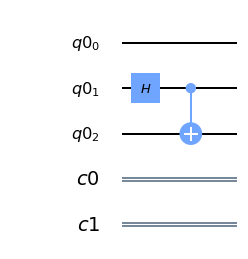

In [7]:
# Step 1: Eve creates an entanged pair of qubits a and b 
def create_bell_pair(qc, a, b):
    """   Creates a bell pair in qc using Qubits a and b  """ 
    qc.h(a) # put Qubit a into state |+> 
    qc.cx(a,b) # CNOT with a as control and b as target
    # Eve entangles qubits q1 and q2 , Lets apply this to our circuit

create_bell_pair(teleportation_circuit, 1, 2)
# View the circuit so far. 
teleportation_circuit.draw()

In [8]:
# Alice owns q1 and Bob owns q2

In [10]:
# Step 2:
def alice_gates(qc, psi, a):
    qc.cx(psi,a)
    qc.h(psi)


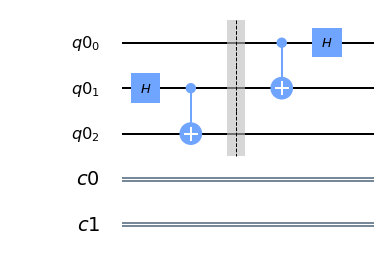

In [11]:
# Let's apply this to circuit
teleportation_circuit.barrier()
alice_gates(teleportation_circuit,0,1)
teleportation_circuit.draw()